
## City Temperatures Practice Analysis

### Will Bennett 3/24/2023

Basic analysis of city temperatures over time. Data source is [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/daily-temperature-of-major-cities).

From the source:
> **Context**
Global warming is the ongoing rise of the average temperature of the Earth's climate system and has been demonstrated by direct temperature measurements and by measurements of various effects of the warming - Wikipedia
>
> So a dataset on the temperature of major cities of the world will help analyze the same. Also weather information is helpful for a lot of data science tasks like sales forecasting, logistics etc.
>
> Thanks to University of Dayton, the dataset is available as separate txt files for each city [here](http://academic.udayton.edu/kissock/http/Weather/default.htm). The data is available for research and non-commercial purposes only.. Please refer to [this page](http://academic.udayton.edu/kissock/http/Weather/default.htm) for license.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats as st

In [3]:
# Use seaborn for visuals
import seaborn as sns
%matplotlib inline
# Apply the default theme
sns.set_theme()
# Make the visuals bigger, I need it
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
# Load csv of City Temperatures into pandas dataframe

# Defining data types taken from data source
data_types = {
    'Region': 'str', 
    'Country': 'str', 
    'State': 'str', 
    'City': 'str', 
    'Month': 'int', 
    'Day': 'int', 
    'Year': 'int', 
    'AvgTemperature': 'float'}

file_name = './data/city_temperature.csv'
travel_df = pd.read_csv(file_name, dtype=data_types)
travel_df.set_index('City') # Setting the index to city since that is the focus of the analysis

,Region,Country,State,Month,Day,Year,AvgTemperature
City,,,,,,,
Algiers,Africa,Algeria,NaN,1,1,1995,64.2
Algiers,Africa,Algeria,NaN,1,2,1995,49.4
Algiers,Africa,Algeria,NaN,1,3,1995,48.8
Algiers,Africa,Algeria,NaN,1,4,1995,46.4
Algiers,Africa,Algeria,NaN,1,5,1995,47.9
...,...,...,...,...,...,...,...
San Juan Puerto Rico,North America,US,Additional Territories,7,27,2013,82.4
San Juan Puerto Rico,North America,US,Additional Territories,7,28,2013,81.6
San Juan Puerto Rico,North America,US,Additional Territories,7,29,2013,84.2


In [5]:
# Showcase data head
travel_df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


### Data Cleaning
For the purpose of this example I will assume the data has been cleaned. I will check for missing values however.

In [6]:
# 6. Examine missing values
print("Missing values distribution: ")
print(travel_df.isnull().mean())
print("")

Missing values distribution: 
Region            0.000000
Country           0.000000
State             0.499252
City              0.000000
Month             0.000000
Day               0.000000
Year              0.000000
AvgTemperature    0.000000
dtype: float64



Conclusion: State is missing. Thus any analysis that is at the state level should not include null state values.

### Exploratory Data Analysis
This will include:
- Calculating basic descriptive statistics such as the mean, the median, and the mode
- Creating a range of plots including histograms, scatter plots, and distribution curves to identify trends in the data
- Other interactive visualizations to focus on a specific segments of data

In [7]:
# Get the temperatures into a numpy array for analysis 
city_temperatures = travel_df['AvgTemperature'].to_numpy()

In [8]:
# Find mean, median, and mode
temp_mean = np.round(np.mean(city_temperatures),1)
temp_median = np.round(np.median(city_temperatures),1)
temp_mode = np.round(st.mode(city_temperatures)[0][0],1)

print(f'The mean temperature is {temp_mean} degrees fahrenheit')
print(f'The median temperature is {temp_median} degrees fahrenheit')
print(f'The mode temperature is {temp_mode} degrees fahrenheit')

The mean temperature is 56.0 degrees fahrenheit
The median temperature is 62.5 degrees fahrenheit
The mode temperature is -99.0 degrees fahrenheit


**The mode being -99 is suspicious**

In [9]:
Q1 = np.percentile(city_temperatures, 25)
Q3 = np.percentile(city_temperatures, 75)
IQR = np.round(Q3 - Q1,1)
temp_min = np.round(Q1 - 1.5 * IQR)
temp_max = np.round(Q3 + 1.5 * IQR)
print(f'This is the 25% quartile": {Q1}')
print(f'This is the 75% quartile: {Q3}')
print(f'This is the IQR: {IQR}')
print(f'This is the minimum: {minimum}')
print(f'This is the maximim: {maximum}')

boxplot = sns.boxplot(data=travel_df['AvgTemperature'])

This is the 25% quartile": 45.8
This is the 75% quartile: 75.5
This is the IQR: 29.7


NameError: name 'minimum' is not defined

### Investigating Outliers
we seem to have a significant number of outliers in this data set. Let's check out the data and see what we want to do with it. Some possibilities include:
- Data has been included in °C not °F so we may want to exclude some data
- Since the data is collected based on cities, the few cities in cold region may be considered outside a normal distribution
- Bad data could be included and we way want to clean it

In [10]:
travel_temp_outliers = travel_df[travel_df['AvgTemperature'] < temp_min] 
travel_temp_outliers = travel_temp_outliers[travel_temp_outliers['AvgTemperature'] > -99] # Remove the -99 values
travel_temp_outliers.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
294372,Asia,China,NaN,Shenyang,1,16,1996,-1.4
294724,Asia,China,NaN,Shenyang,1,2,1997,-5.6
294725,Asia,China,NaN,Shenyang,1,3,1997,-4.2
294727,Asia,China,NaN,Shenyang,1,5,1997,-0.9
294728,Asia,China,NaN,Shenyang,1,6,1997,-2.9


Conclusion: We should remove the -99 values but keep the rest

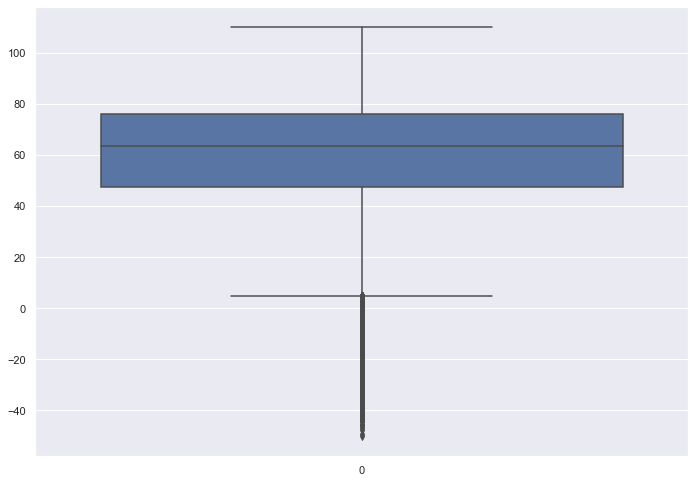

In [24]:
travel_df_cleaned = travel_df[travel_df['AvgTemperature'] != -99] 
boxplot = sns.boxplot(data=travel_df_cleaned['AvgTemperature'])

### Cleaned Data Exploration

In [25]:
# Adding a new datetime column

date_time_array = pd.to_datetime(travel_df_cleaned.loc[:, ('Year', 'Month','Day')])

travel_df_cleaned.insert(7, "DateTime", date_time_array, True)

travel_df_cleaned.head()

,Region,Country,State,City,Month,Day,Year,DateTime,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,1995-01-01,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,1995-01-02,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,1995-01-03,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,1995-01-04,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,1995-01-05,47.9


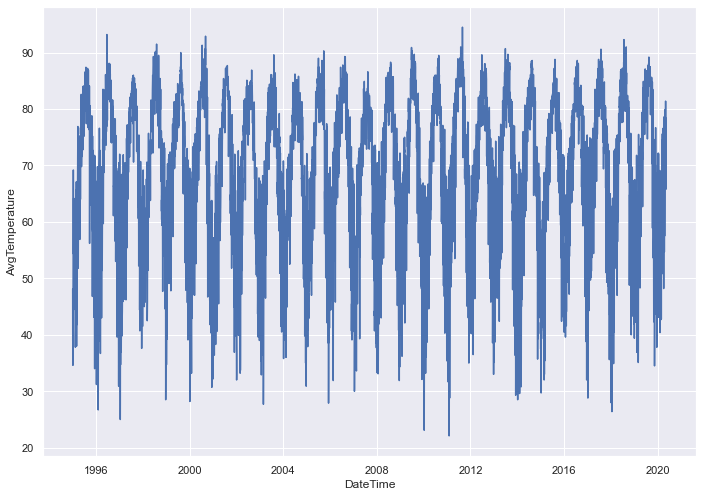

In [36]:
# Chart over time for a single city, let's use Austin, TX

austin_tx_temps = travel_df_cleaned.loc[(travel_df_cleaned['City'] == 'Austin') 
                                        & (travel_df_cleaned['State'] == 'Texas') ]


austin_plot = sns.lineplot(x="DateTime", y="AvgTemperature",data=austin_tx_temps)
